In [1]:
"""
サポートベクトルマシンは、境界付近の重要なデータを基準に、
クラス間の距離が最大となる決定境界を学習する分類手法であることを理解した。
実際に作成した図から、先進国はインターネット利用率と第三次産業割合がともに高い領域に集中していることが分かった。
また、決定境界の傾きから、第三次産業割合が経済発展の判別により強く影響している可能性が読み取れた。
訓練用とテスト用で類似した分類結果が得られたことから、モデルは過学習せず一定の汎化性能を持つと考えられる。
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 20)

dt = pd.read_csv('gdp.csv')

dt["tertiary_industry_share"] = dt["tertiary_industry_share"].fillna(dt["tertiary_industry_share"].median())
dt["internet_usage_rate"] = dt["internet_usage_rate"].fillna(dt["internet_usage_rate"].median())

X = dt.iloc[:, 1:-1].values
y = dt.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

print(classifier.predict([[75,90]]))

#reshape(len(y_pred or y_test), 1)➡「1列の縦ベクトル」に変換
#np.concatenate((A, B), 1)➡A と B を 横方向（axis=1）に結合

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

"""
cm = confusion_matrix(y_test, y_pred)の表

途上国とあてた数➡39,間違った数➡1
先進国とあてた数➡8,間違った数➡2

accuracy_scoreの計算
正しく当てた数 / 全体
= (39 + 8) / (39 + 1 + 2 + 8)
= 47 / 50
= 0.94

"""

[1]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[39  1]
 [ 2  8]]


'\ncm = confusion_matrix(y_test, y_pred)の表\n\n途上国とあてた数➡39,間違った数➡1\n先進国とあてた数➡8,間違った数➡2\n\naccuracy_scoreの計算\n正しく当てた数 / 全体\n= (39 + 8) / (39 + 1 + 2 + 8)\n= 47 / 50\n= 0.94\n\n'

/tmp/ipython-input-577387568.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


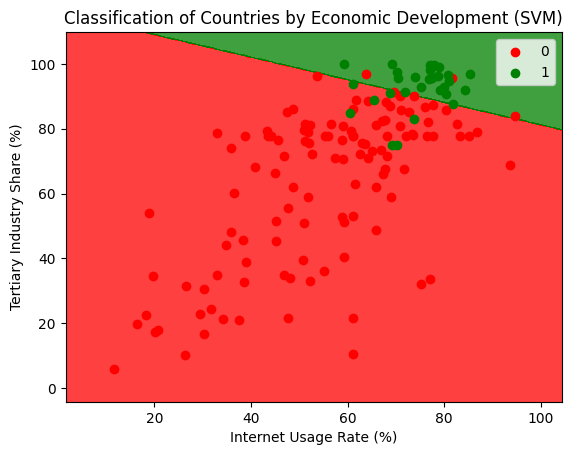

In [2]:
from matplotlib.colors import ListedColormap
#np.meshgrid➡横軸用の値の列,縦軸用の値の列を組み合わせて平面上の全点を作る
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 10, stop = X_train[:, 0].max() + 10, step = 0.25),
 np.arange(start = X_train[:, 1].min() - 10, stop = X_train[:, 1].max() + 10, step = 0.25))

#contourf➡平面を色で塗り分ける関数
#ravel➡全点をまとめて予測するために2次元 → 1次元に平らにする
#np.array➡1行 = 1点（SVMに渡せる形）
#classifier.predict➡平面上のすべての点を0か1か分類
#reshape(X1.shape)➡contourf は 2次元配列が必要なため、予測結果を 元の格子の形 に戻す
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
#グラフの表示範囲（地図の端）を、作った格子の範囲にピッタリ合わせている。
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#クラスごとに訓練データを分けて、色を変えて散布図に描いている。
#X_train[y_train == j, 0]➡クラス j の x座標だけ取り出す
#X_train[y_train == j, 1]➡クラス j の y座標だけ取り出す
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification of Countries by Economic Development (SVM)')
plt.xlabel('Internet Usage Rate (%)')
plt.ylabel('Tertiary Industry Share (%)')
#グラフ中の色や点が何を表しているかを示す凡例を表示するための関数
plt.legend()
plt.show()

/tmp/ipython-input-434231751.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


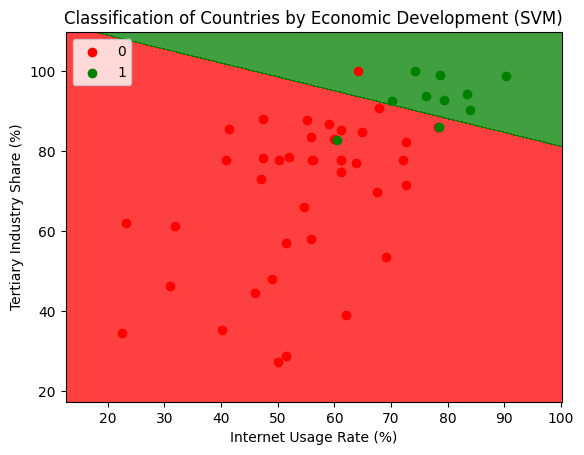

In [3]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 10, stop = X_test[:, 0].max() + 10, step = 0.25),
 np.arange(start = X_test[:, 1].min() - 10, stop = X_test[:, 1].max() + 10, step = 0.25))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Classification of Countries by Economic Development (SVM)')
plt.xlabel('Internet Usage Rate (%)')
plt.ylabel('Tertiary Industry Share (%)')
plt.legend()
plt.show()